# Univariate Linear Regression

$ h_\theta(x) = \theta_0 + \theta_1 * x $

## Cost function

$ J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 $

## Gradient descent

repeat until convergence {

>$ \theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1) $

}

$ \frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) $

$ \frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)} $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

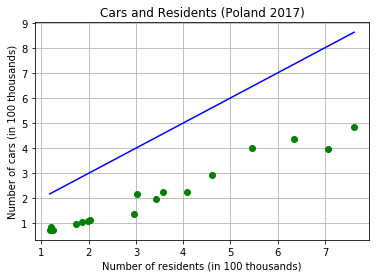

In [2]:
# Number of residents
X = np.array([761873, 706004, 634487, 545680, 461489, 407180, 357652, 341722, 301834, 295459, 203158, 198857, 185123, 173831, 124145, 119574, 117738])
X = X * 0.00001
m = X.size
# Number of cars
Y = np.array([482747, 397452, 437672, 401576, 294667, 226191, 224288, 196850, 218852, 138271, 114581, 110440, 107436, 99258, 74317, 86604, 74210])
Y = Y * 0.00001

# Create copy of array X and insert column of ones at index 0.
# Now we can calculate h_teta(x) = np.dot(Xprim, teta)
Xprim = np.copy(X)
Xprim.shape = (m, 1)
Xprim = np.insert(Xprim, 0, 1, axis=1)

# Initial theta parameters
theta = np.array([1, 1])

h_theta = np.dot(Xprim, theta)

#plt.plot(X, Y, 'go', X, np.dot(Xprim, theta), 'b')
plt.plot(X, Y, 'go')
plt.plot(X, h_theta, 'b')

plt.grid(True)
plt.xlabel('Number of residents (in 100 thousands)')
plt.ylabel('Number of cars (in 100 thousands)')
plt.title('Cars and Residents (Poland 2017)')
plt.show()

In [3]:
J = np.sum(np.power(h_theta - Y, 2)) * 1/(2*m)
alpha = 0.01

J_arr = []
n_arr = []
n = 0

while J > 0.05 or n > 1000:
    n_arr.append(n)
    J_arr.append(J)
    
    t0 = alpha * np.sum(h_theta - Y) * 1/m
    t1 = alpha * (h_theta - Y).dot(X) * 1/m 

    theta = theta - np.array([t0, t1])
    
    h_theta = np.dot(Xprim, theta)
    J = np.sum(np.power(h_theta - Y, 2)) * 1/(2*m)
    
    n += 1

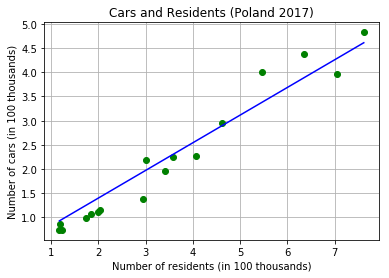

In [4]:
#plt.plot(X, Y, 'go', X, np.dot(Xprim, teta), 'b')
plt.plot(X, Y, 'go')
plt.plot(X, h_theta, 'b')

plt.grid(True)
plt.xlabel('Number of residents (in 100 thousands)')
plt.ylabel('Number of cars (in 100 thousands)')
plt.title('Cars and Residents (Poland 2017)')
plt.show()

In [5]:
theta

array([ 0.25644877,  0.57151418])

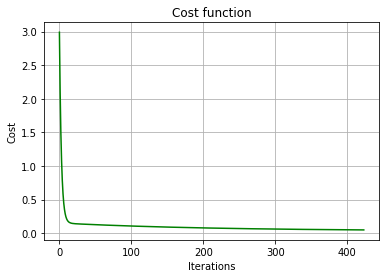

In [6]:
plt.plot(n_arr, J_arr, 'g')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function')
plt.show()